# Investment Type Recommender System

## Business Understanding

### Overview
Many Kenyans, especially young adults and first-time investors, struggle to identify investment avenues that align with their financial goals, risk appetite, and income level. The lack of personalized financial guidance often leads to poor or delayed investment decisions.

### Challenges
- **Low financial literacy and accessibility to advisory services**  
  Many potential investors lack foundational knowledge or support systems to understand available investment options or evaluate their suitability.

- **Overwhelming investment options**  
  The abundance of options—such as SACCOs, stocks, real estate, government bonds, and money market funds—can be confusing and lead to decision fatigue.

- **One-size-fits-all investment marketing**  
  Most financial institutions promote products generically, failing to account for individual goals, income, and risk profiles.

- **Lack of data-driven tools for personalized investment planning**  
  There is limited availability of intelligent systems to assist users in navigating investments based on their unique profiles.

- **Distrust and fear of loss**  
  Without adequate knowledge or guidance, potential investors may fear financial loss or fall victim to scams, leading to investment hesitation.

### Proposed Solution
A **machine learning-based recommender system** that suggests ideal investment types based on a user's financial profile, risk tolerance, and goals. This system can help both fintech platforms and financial institutions deliver personalized advisory services at scale.

### Brief Conclusion
By guiding users toward the most suitable investment types, this solution aims to enhance financial inclusion and support smarter, confidence-driven investment decisions.


## Problem Statement
Many individuals, especially in emerging markets, face significant challenges in making informed investment decisions due to limited financial literacy and lack of personalized advisory services. The wide range of available investment options—SACCOs, stocks, real estate, government bonds, and money market funds—can be overwhelming without guidance. Additionally, the generic approach in investment marketing overlooks the diverse financial goals, income levels, and risk appetites of potential investors, leading to poor financial outcomes and disengagement from long-term wealth-building.


## Objectives

- **Analysis-Based**  
  Understand investment behaviors among Kenyan users and segment them based on patterns.

- **Feature Engineering-Based**  
  Create user profiles using financial behavior indicators such as:
  - Income level
  - Savings rate
  - Age
  - Financial goals

- **Modeling-Based**  
  Build and evaluate recommender models, including:
  - Content-based filtering
  - Hybrid approaches (clustering + classification)


## Data Understanding

### Data Sourcing
- Publicly available financial survey data (e.g., **FinAccess Kenya survey**)
- Simulated user profiles or anonymized fintech customer data
- Investment platform usage data (e.g., user interest in asset types)
- Economic indicators (e.g., interest rates, inflation)

### Features and Relevance
- Demographics: Age, gender, location  
- Financials: Income, expenses, debt levels  
- Profile: Risk profile (low/medium/high)  
- Preferences: Investment goals (short-term/long-term, passive/active)  
- History: Past investment experience


## Data Preparation

### Format
- Data will be collected and processed in **Excel format**

### Actions
- Handle missing values
- Encode categorical variables
- Normalize numeric fields
- Create derived features (e.g., savings rate, risk-adjusted return scores)
- Segment data by user type or financial tier


## Deployment

### API
- **Framework:** FastAPI  
- **Endpoints:** Accept user profile data and return recommended investment type(s)  
- **Model Storage:** Serialized using `.pkl` or `.joblib`

### UI
- **Framework:** Streamlit  
- **Function:** Allows users to input financial info and receive personalized investment suggestions

### Prototypes / Mockups
- **Key Screens:**
  - Welcome Screen
  - Financial Profile Input
  - Investment Suggestions


In cell below we import libraries

In [ ]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# load data

file_path = "../data/2024_Finaccess_Publicdata.xlsx"

invest_df = pd.read_excel(file_path)
invest_df.head()

interview__key                     interview__id    county   A07    A08  \
0    21-61-43-44  00005e63e7424aa19e63adb071955233   Garissa   225  Urban   
1    87-78-54-60  000718d26f5942998522033a66594b4c   Garissa   223  Urban   
2    32-71-19-84  0008721681d2468aa1ef456bba4475dc     Busia  1514  Urban   
3    48-18-78-99  00099e961d49470585c1a7f49fa3b7fb    Kiambu   796  Urban   
4    50-82-98-89  000bb72e959b4dd48443da902c01e920  Murang'a   763  Urban   

   A10                           Interview_Status             A9i         Z1  \
0    1  Household found with competent respondent  Access granted  completed   
1    3  Household found with competent respondent  Access granted  completed   
2    3  Household found with competent respondent  Access granted  completed   
3    3  Household found with competent respondent  Access granted  completed   
4   16  Household found with competent respondent  Access granted  completed   

      A13  ...  sacco_redress  mobilemoney_redress  mobilebank_redress  \
0    Male  ...            NaN                  NaN                 NaN   
1    Male  ...            NaN                  NaN                 NaN   
2  Female  ...            NaN                  NaN                 NaN   
3    Male  ...            NaN                  NaN                 NaN   
4  Female  ...            NaN                  NaN                 NaN   

   not_registered_mmoney_24 using_someone_acc insurance_including_NHIF_use  \
0                        No               NaN                   Never used   
1                        No               NaN                   Never used   
2                        No               NaN                   Never used   
3                        No               NaN                   Never used   
4                        No               Yes                   Never used   

   All_Insurance_excluding_NHIF_use                 PWD  Latitude  Longitude  
0                        Never used  Without Disability -0.435423  39.636586  
1                        Never used  Without Disability  0.058794  40.305006  
2                        Never used  Without Disability  0.636836  34.277390  
3                        Never used  Without Disability -1.251917  36.719076  
4                        Never used  Without Disability -0.795820  37.131085  

[5 rows x 3816 columns]

In [3]:
# check shape of data

invest_df.shape

(20871, 3816)

The output above shows that dataset contains **20871 entries and 3816 columns**. 

In cell below we check for metadata summary and numeric summary

In [4]:
# check metadata summary & numeric

def data_summary(df):
    print("-----info-----")
    df.info()

    print("-----describe-----")
    df.describe()

    return df


data_summary(invest_df)



-----info-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20871 entries, 0 to 20870
Columns: 3816 entries, interview__key to Longitude
dtypes: float64(2303), int64(185), object(1328)
memory usage: 607.6+ MB
-----describe-----


interview__key                     interview__id        county   A07  \
0        21-61-43-44  00005e63e7424aa19e63adb071955233       Garissa   225   
1        87-78-54-60  000718d26f5942998522033a66594b4c       Garissa   223   
2        32-71-19-84  0008721681d2468aa1ef456bba4475dc         Busia  1514   
3        48-18-78-99  00099e961d49470585c1a7f49fa3b7fb        Kiambu   796   
4        50-82-98-89  000bb72e959b4dd48443da902c01e920      Murang'a   763   
...              ...                               ...           ...   ...   
20866    96-94-76-93  ffefe104529e439fb916d956d10a9dc0         Wajir  1847   
20867    40-55-72-03  fff39eec827f4ddc90e73a0792092bf9  Nairobi City  1815   
20868    10-75-82-28  fff70af11a2e49649feae012317ce7d5          Embu   443   
20869    77-66-40-97  fff8b3b628df4b67889e26af8df90ef7  Taita-Taveta   213   
20870    09-26-74-74  fffe9b46c1014de9be537c63c210014c         Kisii  1706   

         A08  A10                           Interview_Status             A9i  \
0      Urban    1  Household found with competent respondent  Access granted   
1      Urban    3  Household found with competent respondent  Access granted   
2      Urban    3  Household found with competent respondent  Access granted   
3      Urban    3  Household found with competent respondent  Access granted   
4      Urban   16  Household found with competent respondent  Access granted   
...      ...  ...                                        ...             ...   
20866  Rural    1  Household found with competent respondent  Access granted   
20867  Urban   25  Household found with competent respondent  Access granted   
20868  Rural    1  Household found with competent respondent  Access granted   
20869  Urban    1  Household found with competent respondent  Access granted   
20870  Rural    1  Household found with competent respondent  Access granted   

              Z1     A13  ...  sacco_redress  mobilemoney_redress  \
0      completed    Male  ...            NaN                  NaN   
1      completed    Male  ...            NaN                  NaN   
2      completed  Female  ...            NaN                  NaN   
3      completed    Male  ...            NaN                  NaN   
4      completed  Female  ...            NaN                  NaN   
...          ...     ...  ...            ...                  ...   
20866  completed    Male  ...            NaN                  NaN   
20867  completed  Female  ...            NaN                  NaN   
20868  completed    Male  ...            NaN                  NaN   
20869  completed  Female  ...            NaN                  NaN   
20870  completed    Male  ...            NaN                  NaN   

       mobilebank_redress  not_registered_mmoney_24 using_someone_acc  \
0                     NaN                        No               NaN   
1                     NaN                        No               NaN   
2                     NaN                        No               NaN   
3                     NaN                        No               NaN   
4                     NaN                        No               Yes   
...                   ...                       ...               ...   
20866                 NaN                        No               NaN   
20867                 NaN                        No               NaN   
20868                 NaN                        No               NaN   
20869                 NaN                        No               NaN   
20870                 NaN                       Yes                No   

      insurance_including_NHIF_use  All_Insurance_excluding_NHIF_use  \
0                       Never used                        Never used   
1                       Never used                        Never used   
2                       Never used                        Never used   
3                       Never used                        Never used   
4                       Never used        

The ouput above shows dataset contains total `20871 entries`and  `3816 columns` in which `2303 columns are float`, `185 integers` and `1328 object` 

### Basic Data cleaning

In cell below we inspect data and drop all columns not needed based on domain knowledge and data description, then check for missing values, duplicates, standadize all categorical data to lower case and remove white, and impute for the missing values

In cell below we check for the missing values and impute them for efficient feature engineering

In [7]:
# check for missing values

def missing_values(df):
    missing = df.isnull().sum()
    missing = missing[missing > 0].sort_values(ascending=False)
   
    return missing

missing_values(invest_df)


M10i       20871
N11bi      20871
K5i        20871
J3__187    20871
J3__188    20871
           ...  
B2Eii          1
B2Ei           1
B2F            1
B2D            1
A24iii         1
Length: 3318, dtype: int64

for `numeric_values` we impute with **median** and for `categorical` we use **mode** or **unknown**. we drop columns we much missing values.


In [8]:
# make copy of original data

invest_df_copy = invest_df.copy()

In [9]:
# Drop columns with much missing values
def drop_columns(df, columns_missing):
    df_cleaned = df.drop(columns=columns_missing, axis=1, errors='ignore')  # errors='ignore' handles any misnamed columns gracefully
    print(f"Dropped {len(columns_missing)} columns.")
    return df_cleaned

entries = [
    'investment_redress', 'pension_redress', 'mobilebank_redress', 'sacco_redress', 'creditonly_redress',
    'trad_mfi_satisfaction', 'bank_redress', 'insurance_redress', 'trad_mfi_moneylost', 'trad_mfi_unsolicited',
    'trad_mfi_downtime', 'trad_mfi_unexpectedcharges', 'trad_mfi_unethicalrecovery', 'digital_app_satisfaction',
    'digital_app_moneylost', 'digital_app_unsolicited', 'digitalapps_unexpectedcharges', 'digital_app_downtime',
    'digital_apps_unethicalrecovery', 'traditional_mfi_issues', 'investment_unexpectedcharges_fnl',
    'investment_sold_fnl', 'investment_lostmoney_fnl', 'investment_downtime_fnl', 'investment_issues_fnl',
    'investment_satisfaction', 'digital_issues', 'hirepurchase_satisfaction', 'hirepurchase_moneylost',
    'hirepurchase_downtime', 'hirepurchase_unexpectedcharges', 'hirepurchase_unsolicited',
    'hirepurchase_unethicalrecovery', 'hirepurchase_issues', 'mobilemoney_redress',
    'creditonlyagree_satisfactionl', 'creditonly_mfi_moneylost', 'creditonly_mfi_downtime',
    'creditonly_mfi_unsolicited', 'creditonly_mfi_unexpectedcharges', 'creditonly_mfi_unethicalrecovery',
    'creditonly_mfi_issues', 'pension_unethical_fnl', 'pension_underpayment_fnl', 'pension_attachment',
    'pension_delayed_fnl', 'pension_issues_fnl', 'pension_satisfaction', 'pension_lostmoney_fnl',
    'sacco_unexpectedcharges'
]


invest_df_copy = drop_columns(invest_df_copy, entries)



Dropped 50 columns.


In cell above we drop all columns with much missing value. Below we proceed to impute missing for both `numeric_values` and `categorical_values`.

In [43]:
# impute missing values for both numeric_values and categorical values

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

def impute_missing_values(df):
    """Impute missing values: numeric with median, categorical with mode or 'unknown'."""
    for col in df.columns:
        if df[col].isnull().sum() == 0:
            continue
        if df[col].dtype in ['float64', 'int64']:
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
        else:
            mode_val = df[col].mode()
            if not mode_val.empty:
                df[col].fillna(mode_val[0], inplace=True)
            else:
                df[col].fillna('unknown', inplace=True)
    print("Imputed missing values for all applicable columns.")
    return df

invest_df_copy = impute_missing_values(invest_df_copy)


c:\Users\ronny somi\Documents\Group4_Capstone_Final_Project\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\ronny somi\Documents\Group4_Capstone_Final_Project\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\ronny somi\Documents\Group4_Capstone_Final_Project\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\ronny somi\Documents\Group4_Capstone_Final_Project\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\ronny somi\Documents\Group4_Capstone_Final_Project\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Me

Imputed missing values for all applicable columns.


In [11]:
# check for missing values after imputing

invest_df_copy.isnull().sum()

interview__key                      0
interview__id                       0
county                              0
A07                                 0
A08                                 0
                                   ..
insurance_including_NHIF_use        0
All_Insurance_excluding_NHIF_use    0
PWD                                 0
Latitude                            0
Longitude                           0
Length: 3767, dtype: int64

In [12]:
# check for duplicates

invest_df_copy.duplicated().sum()

np.int64(0)

**No duplicates** found. Below we `standardize categorical data` by standardizing all letters to lower, and removing whitespace  

In [13]:
# standardize categorical data

def clean_cat_text(df):
    cat_cols = df.select_dtypes(include="object").columns
    for col in cat_cols:
        df[col] = df[col].astype(str).str.strip().str.lower()
    print("standardized all categorical text to lowercase and stripped whitespace")

    return df

invest_df_copy = clean_cat_text(invest_df_copy)
invest_df_copy.head()

standardized all categorical text to lowercase and stripped whitespace


interview__key                     interview__id    county   A07    A08  \
0    21-61-43-44  00005e63e7424aa19e63adb071955233   garissa   225  urban   
1    87-78-54-60  000718d26f5942998522033a66594b4c   garissa   223  urban   
2    32-71-19-84  0008721681d2468aa1ef456bba4475dc     busia  1514  urban   
3    48-18-78-99  00099e961d49470585c1a7f49fa3b7fb    kiambu   796  urban   
4    50-82-98-89  000bb72e959b4dd48443da902c01e920  murang'a   763  urban   

   A10                           Interview_Status             A9i         Z1  \
0    1  household found with competent respondent  access granted  completed   
1    3  household found with competent respondent  access granted  completed   
2    3  household found with competent respondent  access granted  completed   
3    3  household found with competent respondent  access granted  completed   
4   16  household found with competent respondent  access granted  completed   

      A13  ...  sacco_satisfaction  mobilemoney_satisfaction  \
0    male  ...           satisfied                 satisfied   
1    male  ...           satisfied                 satisfied   
2  female  ...           satisfied                 satisfied   
3    male  ...           satisfied                 satisfied   
4  female  ...           satisfied                 satisfied   

   mobilebank_satisfaction  not_registered_mmoney_24 using_someone_acc  \
0                satisfied                        no               yes   
1                satisfied                        no               yes   
2                satisfied                        no               yes   
3                satisfied                        no               yes   
4                satisfied                        no               yes   

  insurance_including_NHIF_use  All_Insurance_excluding_NHIF_use  \
0                   never used                        never used   
1                   never used                        never used   
2                   never used                        never used   
3                   never used                        never used   
4                   never used                        never used   

                  PWD  Latitude  Longitude  
0  without disability -0.435423  39.636586  
1  without disability  0.058794  40.305006  
2  without disability  0.636836  34.277390  
3  without disability -1.251917  36.719076  
4  without disability -0.795820  37.131085  

[5 rows x 3767 columns]

### **Preparing data for recommeder system & Feature engineering**

This project focuses on developing a **machine learning-based recommender system designed to suggest appropriate investment products tailored to a user's financial profile, risk tolerance, and personal goals**. To support this, we begun by preparing the dataset through a structured process that includes selecting relevant features, renaming columns for readability, and performing necessary cleaning and exploratory analysis.

We have chosen to implement a **content-based filtering** approach for the recommendation engine. **This decision is guided by the nature of the FinAccess 2024 dataset, which consists of aggregated survey responses rather than individual user-product interaction data**. Collaborative filtering methods such as ALS or SVD typically rely on user-level histories and are therefore not applicable in this context.

Instead, content-based filtering allows us to leverage the dataset's rich demographic and behavioral attributes such as age, gender, region, education level, trust in financial institutions, and satisfaction with financial products to make informed recommendations. By aligning a new user’s profile with patterns observed in similar demographic segments, we can suggest investment options that are likely to be suitable and relevant.

The recommender system works by capturing key user inputs (such as age group, gender, education, region), identifying similar profiles within the dataset, analyzing common or highly rated financial products within those segments, and recommending those products to the user. This personalized, profile-driven approach offers a practical and data-informed way to support individuals in making better investment decisions.


As our data is recorded in `household-level` and not individual-level we treat each household as the user. The unit of our recommendation is per household not per person. we feature engineer columns such as `has_account`, `has_savings`, `receives_remittance`. `We create new binary` features to show **presence or absence** of certern financial behaviours, that is whether any household member uses a savings methods or owns a phone

In cell below we preapare our **X features** and **y feature**, based on the following features from data



- **demographics & preferences**

- **current or past product usage**

- **user preferences**

- **Trust & digital access** 

we start by recording our `items to recommend` which is **investment types**. Then we define features to represent **User profile** those describe household such as `financial access`, `saving behaviour`, `Risk attitude`, `income level`, `education level` and `Household size`, `Digital literacy`

Below we usse `cosine_similarity` to create vectors for recommendation. As we have `user profile` and `investment options` for each household we know which investment methods they use and want to recommend more suitable ones, possibly those they haven't used but similar to what similar household use.

In [ ]:


# Select Relevant Columns
relevant_cols = [
    "A08",              
    "A13",              
    "B3Ii",             
    "U23",              
    "C1_1a",            
    "C1_2",             
    "C1_4",             
    "C1_6",             
    "C1_9",             
    "C1_15",            
    "C1_17",            
    "C1_19",            
    "C1_25",            
    "C1_35"             
]
df_subset = invest_df_copy[relevant_cols].copy()

# Rename Columns 
df_subset.columns = [
    "area_type", "gender", "monthly_income", "monthly_expenditure",
    "save_bank", "save_mobile_money", "save_sacco", "save_friends", "save_digital",
    "loan_mobile", "loan_sacco", "loan_digital", "loan_family", "invest_forex"
]


In [ ]:
#Map Usage Levels to Ordinal 
usage_map = {
    "Never used": 0,
    "Used to use": 1,
    "Currently use": 2,
    pd.NA: 0,
    None: 0
}
behavior_cols = [
    'save_bank', 'save_mobile_money', 'save_sacco', 'save_friends', 'save_digital',
    'loan_mobile', 'loan_sacco', 'loan_digital', 'loan_family', 'invest_forex'
]
df_subset[behavior_cols] = df_subset[behavior_cols].applymap(lambda x: usage_map.get(x, 0))


In [ ]:

# Encode Demographics
df_subset['gender'] = df_subset['gender'].map({'Male': 0, 'Female': 1})
df_subset['area_type'] = df_subset['area_type'].map({'Rural': 0, 'Urban': 1})

In [ ]:
# Fill Missing Numeric Data 
df_subset['monthly_income'] = df_subset['monthly_income'].fillna(df_subset['monthly_income'].median())
df_subset['monthly_expenditure'] = df_subset['monthly_expenditure'].fillna(df_subset['monthly_expenditure'].median())

#Scale Features 
scaler = StandardScaler()
household_scaled = scaler.fit_transform(df_subset)


c:\Users\ronny somi\Documents\Group4_Capstone_Final_Project\.venv\Lib\site-packages\sklearn\utils\extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\ronny somi\Documents\Group4_Capstone_Final_Project\.venv\Lib\site-packages\sklearn\utils\extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\ronny somi\Documents\Group4_Capstone_Final_Project\.venv\Lib\site-packages\sklearn\utils\extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [ ]:
#Create 3 Dummy Investment Profiles
investment_profiles = pd.DataFrame([
    [1, 1, 0.3, 0.3, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0],  
    [1, 1, 0.5, 0.5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], 
    [1, 1, 0.6, 0.6, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2]  
], columns=df_subset.columns, index=['conservative', 'balanced', 'aggressive'])

investment_scaled = scaler.transform(investment_profiles)

In [ ]:

household_scaled = np.nan_to_num(household_scaled, nan=0.0)
investment_scaled = np.nan_to_num(investment_scaled, nan=0.0)


# Compute Cosine Similarity 
similarity_matrix = cosine_similarity(household_scaled, investment_scaled)
recommendations = pd.DataFrame(similarity_matrix, columns=investment_profiles.index)

#Label Top-1 Strategy
df_subset["investment_label"] = recommendations.apply(lambda row: row.nlargest(1).index[0], axis=1)

In [37]:
# Split into features and label
X = df_subset.drop("investment_label", axis=1)
y = df_subset["investment_label"]

In [38]:

# Encode target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

c:\Users\ronny somi\Documents\Group4_Capstone_Final_Project\.venv\Lib\site-packages\sklearn\utils\extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\ronny somi\Documents\Group4_Capstone_Final_Project\.venv\Lib\site-packages\sklearn\utils\extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\ronny somi\Documents\Group4_Capstone_Final_Project\.venv\Lib\site-packages\sklearn\utils\extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [39]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [40]:
# Neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=16)

c:\Users\ronny somi\Documents\Group4_Capstone_Final_Project\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
835/835 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.6714 - loss: 0.6473 - val_accuracy: 0.6850 - val_loss: 0.6246
Epoch 2/30
835/835 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6721 - loss: 0.6328 - val_accuracy: 0.6850 - val_loss: 0.6234
Epoch 3/30
835/835 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6721 - loss: 0.6328 - val_accuracy: 0.6850 - val_loss: 0.6233
Epoch 4/30
835/835 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6721 - loss: 0.6327 - val_accuracy: 0.6850 - val_loss: 0.6240
Epoch 5/30
835/835 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6721 - loss: 0.6327 - val_accuracy: 0.6850 - val_loss: 0.6233
Epoch 6/30
835/835 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6721 - loss: 0.6327 - val_accuracy: 0.6850 - val_loss: 0.6236
Epoch 7/30
835/835 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6721 - loss: 0.6327 - val_accuracy: 0.6850 - val_loss: 0.6237
Epoch 8/30
835/835 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6721 - loss: 0.6328 - val_accuracy: 0

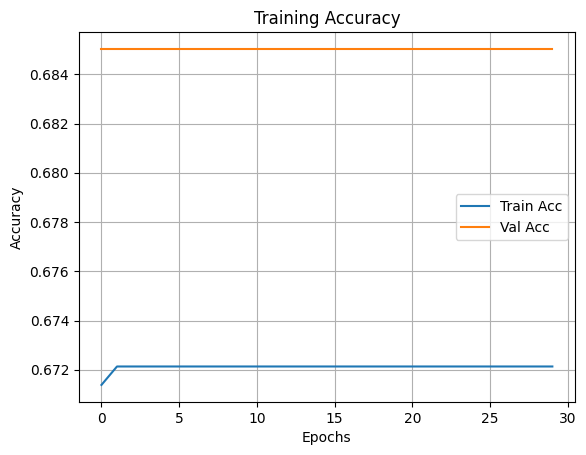

In [41]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [ ]:


# save model
model.save("../models/investment_model.h5")  